# ISLP - Chapter 8 - Exercise 9
### Author: pzuehlke

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from ISLP import load_data, confusion_table

In [2]:
oj = load_data("OJ")
oj = oj.dropna()
oj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Purchase        1070 non-null   category
 1   WeekofPurchase  1070 non-null   int64   
 2   StoreID         1070 non-null   int64   
 3   PriceCH         1070 non-null   float64 
 4   PriceMM         1070 non-null   float64 
 5   DiscCH          1070 non-null   float64 
 6   DiscMM          1070 non-null   float64 
 7   SpecialCH       1070 non-null   int64   
 8   SpecialMM       1070 non-null   int64   
 9   LoyalCH         1070 non-null   float64 
 10  SalePriceMM     1070 non-null   float64 
 11  SalePriceCH     1070 non-null   float64 
 12  PriceDiff       1070 non-null   float64 
 13  Store7          1070 non-null   category
 14  PctDiscMM       1070 non-null   float64 
 15  PctDiscCH       1070 non-null   float64 
 16  ListPriceDiff   1070 non-null   float64 
 17  STORE         

In [3]:
n = oj.shape[0]
p = oj.shape[1] - 1
oj.head(20)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
5,CH,230,7,1.69,1.99,0.00,0.00,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0
6,CH,232,7,1.69,1.99,0.00,0.40,1,1,0.972182,1.59,1.69,-0.10,Yes,0.201005,0.000000,0.30,0
7,CH,234,7,1.75,1.99,0.00,0.40,1,0,0.977746,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
8,CH,235,7,1.75,1.99,0.00,0.40,0,0,0.982197,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
9,CH,238,7,1.75,1.99,0.00,0.40,0,0,0.985757,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0


In [4]:
print(oj["StoreID"].unique())

[1 7 2 3 4]


We see that the possible Store IDs are $ 1,\,2,\,3,\,4 $ and $ 7 $. Further, by
inspecting the data:
* It seems that the variable `Store7` only tells whether the store's ID is $ 7 $ or not.
* Similarly, it seems that `STORE` is just another encoding of `StoreID`, where every store
  keeps its original ID except for store $ 7 $, which is assigned to $ 0 $ in `STORE`.
If these are true, we can drop `Store7` and `STORE` from consideration since they are redundant.
Let's verify these conjectures:

In [5]:
satisfy_first_conjecture = (oj["StoreID"] == 7) == (oj["Store7"] == "Yes")
print(np.all(satisfy_first_conjecture))

satisfy_second_conjecture = (oj["StoreID"] == 7) == (oj["STORE"] == 0)
print(np.all(satisfy_second_conjecture))
# Let's verify the second conjecture for the remaining store IDs 1 through 4:
for i in range(1, 5):
    satisfy_second_conjecture = (oj["StoreID"] == i) == (oj["STORE"] == i)
    print(np.all(satisfy_second_conjecture))

True
True
True
True
True
True


Thus we can safely remove `STORE` and `Store7`:

In [6]:
oj = oj.drop(["STORE", "Store7"], axis=1)
oj.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0.000000,0.000000,0.24
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0.150754,0.000000,0.24
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0.000000,0.091398,0.23
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0.000000,0.000000,0.00
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,0.000000,0.000000,0.00


__9 (a):__

In [7]:
X = oj.drop("Purchase", axis=1)
y = oj["Purchase"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=800, random_state=0
)

__9 (b):__ The tree has an extremely low training error rate of under $ 0.88\% $.

In [8]:
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train, y_train)
training_predictions = tree_model.predict(X_train)
training_error_rate = 1 - np.mean(y_train == training_predictions)
print(f"Training error rate: {training_error_rate:.4f}")

Training error rate: 0.0088


__9 (c):__

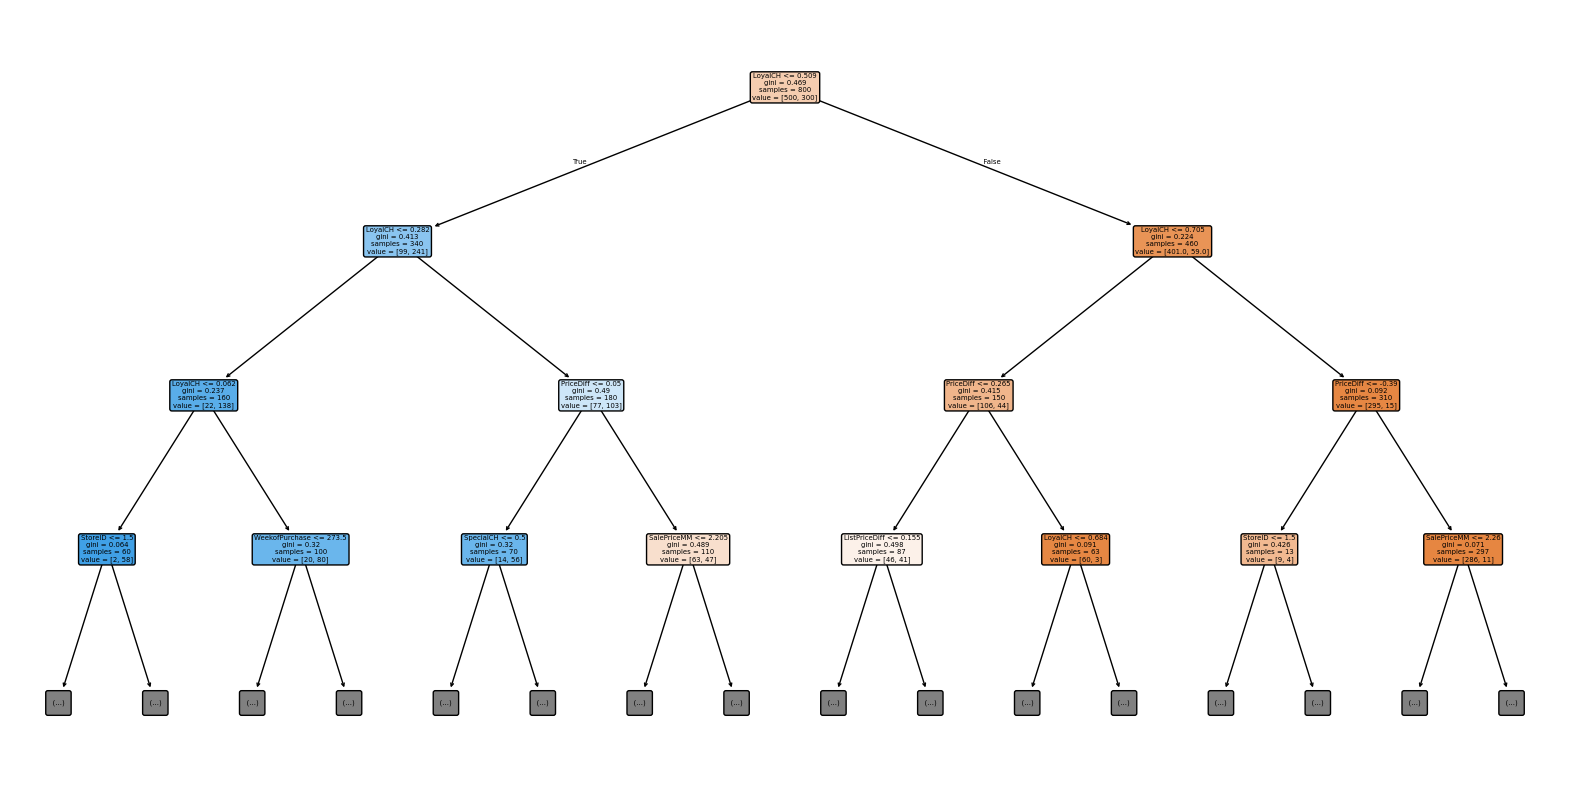

In [9]:
plt.figure(figsize=(20,10))
plot_tree(tree_model, 
          feature_names=X.columns,
          max_depth=3,
          filled=True,
          rounded=True);

By removing the `max_depth=3` argument from `plot_tree`, we can see that the
tree is huge. In particular, it has $ 165 $ terminal nodes (leaves). Let's
verify this:

In [10]:
max_depth = tree_model.get_depth()
print(f"Maximum depth: {max_depth}")
leaves = tree_model.get_n_leaves()
print(f"Number of terminal nodes: {leaves}")

Maximum depth: 20
Number of terminal nodes: 165


In [11]:
feature_importances = pd.DataFrame({
    "feature": X.columns,
    "importance": tree_model.feature_importances_
})
feature_importances = feature_importances.sort_values("importance", ascending=False)
feature_importances

,feature,importance
8,LoyalCH,0.595112
0,WeekofPurchase,0.125330
11,PriceDiff,0.096227
1,StoreID,0.043562
9,SalePriceMM,0.031759
14,ListPriceDiff,0.029761
10,SalePriceCH,0.022447
6,SpecialCH,0.012686
3,PriceMM,0.010703
7,SpecialMM,0.009458


We conclude that a customer's loyalty to the CH brand is by far the most
important predictor. In particular, it is somewhat surprising how it seems that
the price difference between the brands accounts for only about $ 10\% $ of the
purchase decision.

__9 (d):__ There is a mistake in the statement: the function is called
`export_text` (compare p. 356).

In [12]:
tree_text = export_text(tree_model,
                        feature_names=list(X.columns),
                        show_weights=True)
print("\nTree text summary:")
print(tree_text)


Tree text summary:
|--- LoyalCH <= 0.51
|   |--- LoyalCH <= 0.28
|   |   |--- LoyalCH <= 0.06
|   |   |   |--- StoreID <= 1.50
|   |   |   |   |--- DiscMM <= 0.35
|   |   |   |   |   |--- weights: [1.00, 0.00] class: CH
|   |   |   |   |--- DiscMM >  0.35
|   |   |   |   |   |--- weights: [0.00, 2.00] class: MM
|   |   |   |--- StoreID >  1.50
|   |   |   |   |--- WeekofPurchase <= 268.50
|   |   |   |   |   |--- weights: [0.00, 49.00] class: MM
|   |   |   |   |--- WeekofPurchase >  268.50
|   |   |   |   |   |--- LoyalCH <= 0.00
|   |   |   |   |   |   |--- weights: [0.00, 7.00] class: MM
|   |   |   |   |   |--- LoyalCH >  0.00
|   |   |   |   |   |   |--- weights: [1.00, 0.00] class: CH
|   |   |--- LoyalCH >  0.06
|   |   |   |--- WeekofPurchase <= 273.50
|   |   |   |   |--- SalePriceCH <= 1.94
|   |   |   |   |   |--- WeekofPurchase <= 263.50
|   |   |   |   |   |   |--- LoyalCH <= 0.06
|   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: CH
|   |   |   |   |   |   |--

Let's interpret the first leaf node in this tree:
```
...
|   |   |   |--- StoreID <= 1.50
|   |   |   |   |--- DiscMM <= 0.35
|   |   |   |   |   |--- weights: [1.00, 0.00] class: CH
```
The path to get here is:
1. LoyalCH $ \le  0.51 $.
2. LoyalCH $ \le 0.28 $.
3. LoyalCH $ \le 0.06 $ (very low loyalty to CH).
4. StoreID $ \le 1.50 $ (shopping at store 1).
5. DiscMM $ \le 0.35 $.

The weights $ [1.00, 0.00] $ indicate that in this node one customer chose CH and zero chose MM.
In particular, this leaf is completely pure.

__9 (e):__ The test error rate is $ 25.9\% $.

In [15]:
y_pred = tree_model.predict(X_test)
test_error = 1 - np.mean(y_test == y_pred)
print(f"The test error rate is: {test_error:.4f}.")

The test error rate is: 0.2593.


And here's the confusion matrix:

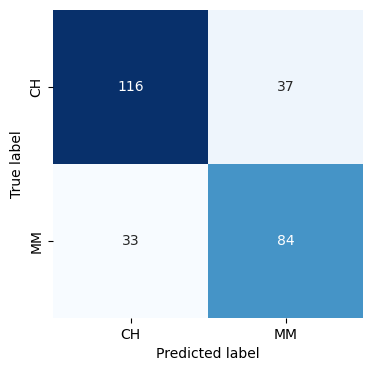

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, 
            annot=True,
            fmt="d",
            cmap="Blues",
            cbar=False,
            xticklabels=["CH", "MM"],
            yticklabels=["CH", "MM"])
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

__9 (f):__ Using cross-validation, it seems that the optimal maximum depth for a tree is $ 4 $.

In [62]:
max_depths = range(1, 21)
cv_errors = []
for depth in max_depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    scores = cross_val_score(tree, X_train, y_train, cv=10)
    cv_errors.append(1 - scores.mean())

best_depth = 1 + np.argmin(cv_errors)
best_cv_score = cv_scores[np.argmin(cv_errors)]
print(f"Best max depth: {best_depth}")
print(f"Best CV error rate: {best_cv_score:.4f}")

Best max depth: 4
Best CV error rate: 0.2000


__9 (g):__

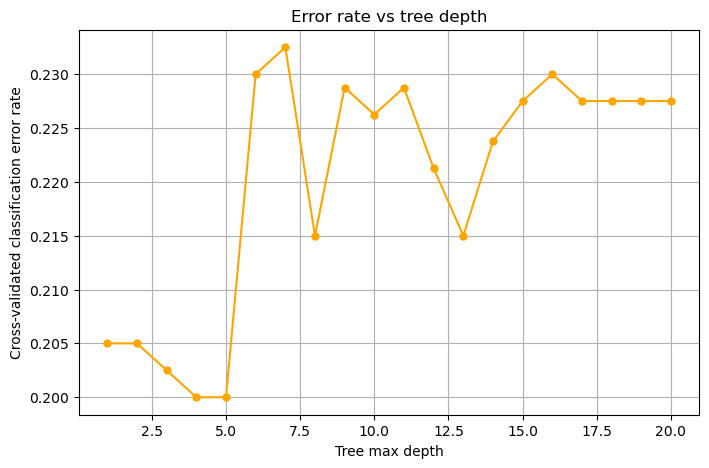

In [58]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(max_depths, cv_errors, marker='o', ms=5, c='orange')
ax.set_xlabel("Tree max depth")
ax.set_ylabel("Cross-validated classification error rate")
ax.set_title("Error rate vs tree depth")
ax.grid(True)
plt.show()

__9 (h):__ This was already answered in item (f). However, looking at the plot,
it seems that there are actually two maximum tree depths for which the
cross-validated error rate attains a minimum value: depths $ 4 $ and $ 5 $. This
is confirmed by the following code:

In [70]:
best_depth = 1 + np.argmin(cv_errors)
best_cv_score = cv_scores[np.argmin(cv_errors)]
best_depths = np.where(cv_errors == best_cv_score)
print(np.array(best_depths).flatten() + 1)  # + 1 because we count indices from 0

[4 5]


__9 (i):__ We begin by fitting an unpruned tree of maximum depth $ 4 $.

In [79]:
unpruned_tree = DecisionTreeClassifier(max_depth=4, random_state=0)
unpruned_tree.fit(X_train, y_train)

unpruned_train_pred = unpruned_tree.predict(X_train)
unpruned_test_pred = unpruned_tree.predict(X_test)
unpruned_train_error = 1 - np.mean(unpruned_train_pred == y_train)
unpruned_test_error = 1 - np.mean(unpruned_test_pred == y_test)

print(f"Total number nodes: {unpruned_tree.tree_.node_count}")
print(f"Number of leaves: {unpruned_tree.get_n_leaves()}")
print(f"Training error rate: {unpruned_train_error:.4f}")
print(f"Test error rate: {unpruned_test_error:.4f}")

Total number nodes: 31
Number of leaves: 16
Training error rate: 0.1512
Test error rate: 0.2111


Note how the test error rate is very close the CV error rate that we had
obtained in item (f). Now we prune the tree using CCP:

In [80]:
path = unpruned_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

trees = []
K = 10
cv_error_rates = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)
    cv_scores = cross_val_score(tree, X_train, y_train, cv=K)
    cv_error_rates.append(1 - np.mean(cv_scores))

tree_errors = pd.DataFrame({
    "ccp_alpha": ccp_alphas,
    "n_nodes": [tree.tree_.node_count for tree in trees],
    "cv_error": cv_error_rates,
})
tree_errors

,ccp_alpha,n_nodes,cv_error
0,0.000000,329,0.22750
1,0.000687,319,0.22375
2,0.000711,319,0.22375
3,0.001057,229,0.23000
4,0.001905,59,0.22125
5,0.002557,37,0.20500
6,0.002604,37,0.20625
7,0.002625,35,0.20375
8,0.004681,15,0.20000
9,0.005093,15,0.19625


In [ ]:
best_index = np.argmin(tree_errors["cv_error"])
pruned_tree = trees[best_index]

__9 (j):__ It is not clear to me if the statement refers to the unpruned tree
from item (b) (completely unrestricted) or the one we constructed in the
beginning item (i) (having optimal maximum depth $ 4 $). In either case, the pruned
tree has a higher _training_ error rate:

In [91]:
pruned_train_pred = pruned_tree.predict(X_train)
pruned_train_error = 1 - np.mean(pruned_train_pred == y_train)
print(f"Unpruned training error rate (unrestricted, item (b)): {training_error_rate:.4f}")
print(f"Unpruned training error rate (tree with max_depth 4, item (i)): {unpruned_train_error:.4f}")
print(f"Pruned training error rate: {pruned_train_error:.4f}")

Unpruned training error rate (unrestricted, item (b)): 0.0088
Unpruned training error rate (tree with max_depth 4, item (i)): 0.1512
Pruned training error rate: 0.1625


__9 (k):__ The pruned tree has a better (i.e., lower) _test_ error rate than
either of the unpruned trees.

In [94]:
pruned_test_pred = pruned_tree.predict(X_test)
pruned_test_error = 1 - np.mean(pruned_test_pred == y_test)
print(f"Unpruned test error rate (unrestricted, item (b)): {test_error:.4f}")
print(f"Unpruned test error rate (tree with max_depth 4, item (i)): {unpruned_test_error:.4f}")
print(f"Pruned test error rate: {pruned_test_error:.4f}")

Unpruned test error rate (unrestricted, item (b)): 0.2593
Unpruned test error rate (tree with max_depth 4, item (i)): 0.2111
Pruned test error rate: 0.2037


Thus, we conclude that the pruned tree has a considerably better performance on
an independent test set, even though its training error rate is about $ 20 $
times larger than that of the totally unpruned tree from item (b).